# Clustering
# 3 - FIFA 2022

## About Dataset

#### Context
Data set is taken from [here](https://www.kaggle.com/datasets/cashncarry/fifa-22-complete-player-dataset). The data is related to stats of football players in a computer game FIFA 2022.

### Columns
- FullName - full name of a player
- Age - age of a player
- Height - height of a player
- Nationality - nationality of a player
- Overall - the overall number that represents how good the player is (higher means better)
- Potential - the maximum 'Overall' that this player can achieve in the game
- Growth - the growth of stats of a player
- BestPosition - player's preffered position in the line-up
- Club - player's current club
- ValueEUR - player's current market value
- WageEUR - player's wage per month
- PrefferedFoot - player's stronger foot
- AttackingWorkRate - player' rate of attacking
- DefensiveWorkRate - player' rate of defensive
- PaceTotal - player's speed
- ShootingTotal - player's shooting skills
- PassingTotal - player's passing skills
- DribblingTotal - player's dribbling ability
- DefendingTotal - player's defending ability
- PhysicalityTotal - player's physicality, more physical player can for example push less physical player

## Import used packages

In [44]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics


## Load the data into the Pandas DataFrame

In [118]:
df = pd.read_csv('players_fifa22.csv', sep=',')
df = df[['FullName','Age', 'Height','Nationality','Overall','Potential','Growth','BestPosition','Club','ValueEUR','WageEUR','PreferredFoot','AttackingWorkRate', 'DefensiveWorkRate','PaceTotal','ShootingTotal','PassingTotal','DribblingTotal','DefendingTotal','PhysicalityTotal']]
df.head()

FullName  Age  Height Nationality  Overall  Potential  \
0                  Lionel Messi   34     170   Argentina       93         93   
1            Robert Lewandowski   32     185      Poland       92         92   
2  C. Ronaldo dos Santos Aveiro   36     187    Portugal       91         91   
3                 Kylian Mbappé   22     182      France       91         95   
4                     Jan Oblak   28     188    Slovenia       91         93   

   Growth BestPosition                 Club   ValueEUR  WageEUR PreferredFoot  \
0       0           RW  Paris Saint-Germain   78000000   320000          Left   
1       0           ST    FC Bayern München  119500000   270000         Right   
2       0           ST    Manchester United   45000000   270000         Right   
3       4           ST  Paris Saint-Germain  194000000   230000         Right   
4       2           GK   Atlético de Madrid  112000000   130000         Right   

  AttackingWorkRate DefensiveWorkRate  PaceTotal  ShootingTotal  PassingTotal  \
0            Medium               Low         85             92            91   
1              High            Medium         78             92            79   
2              High               Low         87             94            80   
3              High               Low         97             88            80   
4            Medium            Medium         87             92            78   

   DribblingTotal  DefendingTotal  PhysicalityTotal  
0              95              34                65  
1              85              44                82  
2              87              34                75  
3              92              36                77  
4              90              52                90

## Structural information

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FullName           19260 non-null  object
 1   Age                19260 non-null  int64 
 2   Height             19260 non-null  int64 
 3   Nationality        19260 non-null  object
 4   Overall            19260 non-null  int64 
 5   Potential          19260 non-null  int64 
 6   Growth             19260 non-null  int64 
 7   BestPosition       19260 non-null  object
 8   Club               19260 non-null  object
 9   ValueEUR           19260 non-null  int64 
 10  WageEUR            19260 non-null  int64 
 11  PreferredFoot      19260 non-null  object
 12  AttackingWorkRate  19260 non-null  object
 13  DefensiveWorkRate  19260 non-null  object
 14  PaceTotal          19260 non-null  int64 
 15  ShootingTotal      19260 non-null  int64 
 16  PassingTotal       19260 non-null  int64

## Categorical columns

In [120]:
cols_categories = df.select_dtypes(exclude=np.number).columns

for col in cols_categories:
    if (col != 'FullName' and col != 'Club'):
        print(col)
        print(df[col].unique().tolist())
        print()

Nationality
['Argentina', 'Poland', 'Portugal', 'France', 'Slovenia', 'Belgium', 'Brazil', 'England', 'Germany', 'Korea Republic', 'Senegal', 'Netherlands', 'Italy', 'Egypt', 'Spain', 'Uruguay', 'Norway', 'Costa Rica', 'Croatia', 'Scotland', 'Slovakia', 'Algeria', 'Hungary', 'Switzerland', 'Denmark', 'Gabon', 'Morocco', 'Nigeria', 'Serbia', 'Austria', 'Sweden', 'Montenegro', "Côte d'Ivoire", 'Mexico', 'Greece', 'Bosnia and Herzegovina', 'Armenia', 'Finland', 'Cameroon', 'Colombia', 'Ghana', 'Canada', 'Czech Republic', 'United States', 'Jamaica', 'Turkey', 'Wales', 'Russia', 'Burkina Faso', 'Togo', 'Venezuela', 'Chile', 'Ukraine', 'Albania', 'Guinea', 'Northern Ireland', 'Israel', 'Congo DR', 'New Zealand', 'China PR', 'Peru', 'Central African Republic', 'Iceland', 'Mali', 'Japan', 'Iran', 'North Macedonia', 'Ecuador', 'Republic of Ireland', 'Mozambique', 'Cape Verde Islands', 'Romania', 'Angola', 'Kosovo', 'Tunisia', 'Australia', 'Paraguay', 'Libya', 'Zambia', 'Zimbabwe', 'Syria', 'Sau

## Numeric columns

In [121]:
cols_numeric = df.select_dtypes(include=np.number).columns
cols_numeric

Index(['Age', 'Height', 'Overall', 'Potential', 'Growth', 'ValueEUR',
       'WageEUR', 'PaceTotal', 'ShootingTotal', 'PassingTotal',
       'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal'],
      dtype='object')

### The columns fits with the source
### Our dataset consists of 7 numerical variables and 13 categorical variables.

## Check if there are None or numpy.NaN or empty string '' or numpy.inf

In [122]:
pd.options.mode.use_inf_as_na = True
df.isna().sum()

FullName             0
Age                  0
Height               0
Nationality          0
Overall              0
Potential            0
Growth               0
BestPosition         0
Club                 0
ValueEUR             0
WageEUR              0
PreferredFoot        0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

### There are no zero values

## Description of dataset

### Categorical columns

In [123]:
df.describe(include=['object']).T

count unique              top   freq
FullName           19260  19042  Lucas Rodríguez      4
Nationality        19260    163          England   1718
BestPosition       19260     15               CB   3744
Club               19260    702       Free agent     76
PreferredFoot      19260      2            Right  14670
AttackingWorkRate  19260      3           Medium  12701
DefensiveWorkRate  19260      3           Medium  14176

### Numeric columns

In [124]:
df.describe(include=['number']).T

count          mean           std    min       25%  \
Age               19260.0  2.518468e+01  4.737340e+00   16.0      21.0   
Height            19260.0  1.813050e+02  6.866151e+00  155.0     176.0   
Overall           19260.0  6.581563e+01  6.817297e+00   48.0      62.0   
Potential         19260.0  7.110010e+01  6.092103e+00   49.0      67.0   
Growth            19260.0  5.284476e+00  5.472201e+00    0.0       0.0   
ValueEUR          19260.0  2.857652e+06  7.604532e+06    0.0  475000.0   
WageEUR           19260.0  8.973528e+03  1.941550e+04    0.0    1000.0   
PaceTotal         19260.0  6.791023e+01  1.065645e+01   28.0      62.0   
ShootingTotal     19260.0  5.353551e+01  1.381348e+01   18.0      44.0   
PassingTotal      19260.0  5.785332e+01  9.835494e+00   25.0      52.0   
DribblingTotal    19260.0  6.302871e+01  9.704853e+00   26.0      58.0   
DefendingTotal    19260.0  5.005810e+01  1.638880e+01   14.0      35.0   
PhysicalityTotal  19260.0  6.467658e+01  9.626269e+00   29.0      58.0   

                       50%        75%          max  
Age                   25.0       29.0         54.0  
Height               181.0      186.0        206.0  
Overall               66.0       70.0         93.0  
Potential             71.0       75.0         95.0  
Growth                 4.0        9.0         26.0  
ValueEUR          975000.0  2000000.0  194000000.0  
WageEUR             3000.0     8000.0     350000.0  
PaceTotal             68.0       75.0         97.0  
ShootingTotal         56.0       64.0         94.0  
PassingTotal          58.0       65.0         93.0  
DribblingTotal        64.0       69.0         95.0  
DefendingTotal        54.0       63.0         91.0  
PhysicalityTotal      66.0       72.0         92.0

# Brief exploration analysis

### Visualization players counts by Age

I would expect most players to be between 20-30 years old.

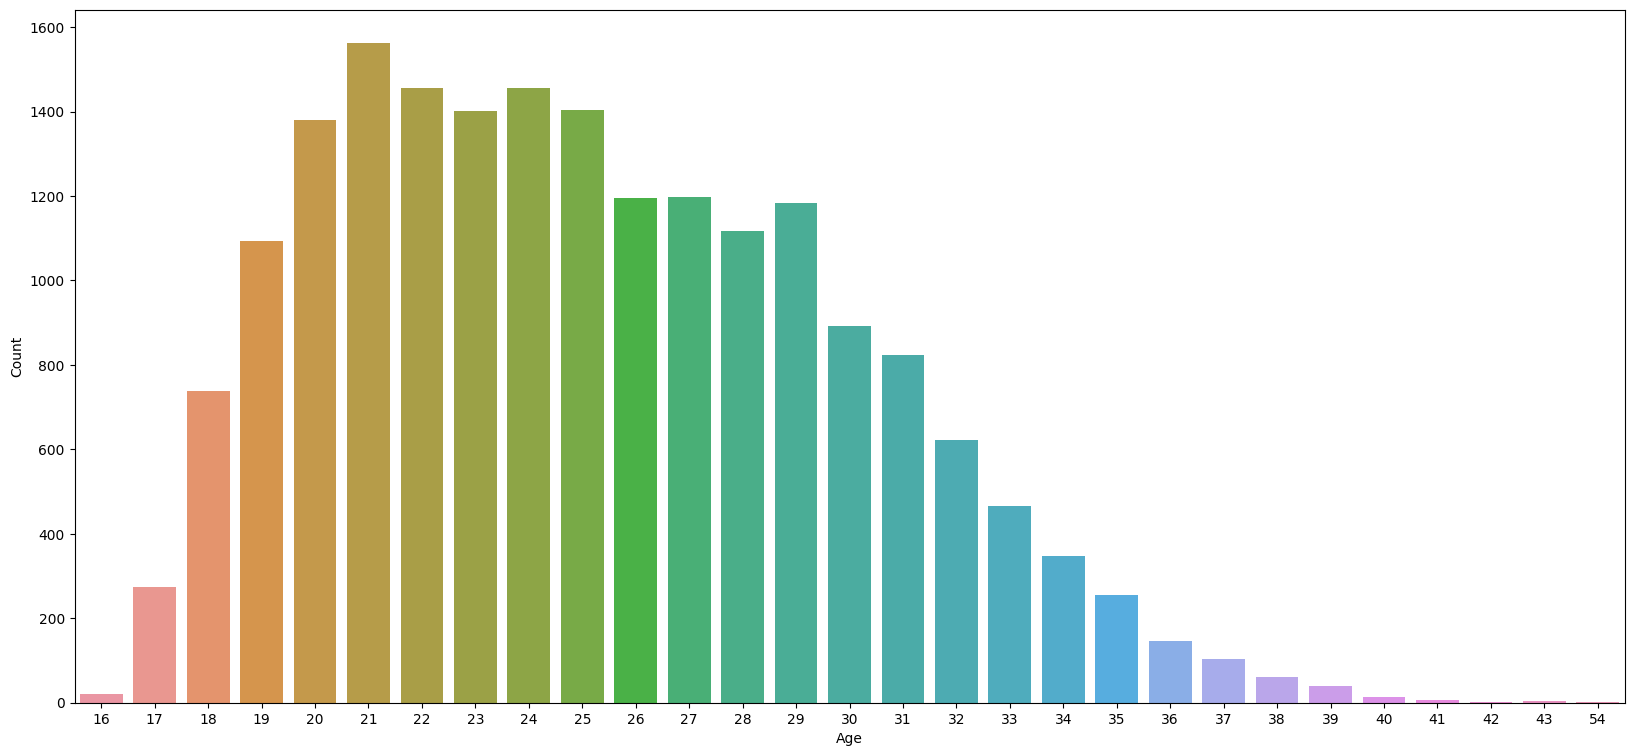

In [125]:
df_age_counts = df.groupby(['Age']).Age.count().reset_index(name='Count')
df_age_counts

fig = plt.figure(figsize=(20, 9))
sns.barplot(data=df_age_counts, x='Age', y = 'Count')
plt.show()

I think I was right, that most players are aged between 20-30 years old.

### Visualization between position and counts

Text(0.5, 1.0, 'Number of players according to their position')

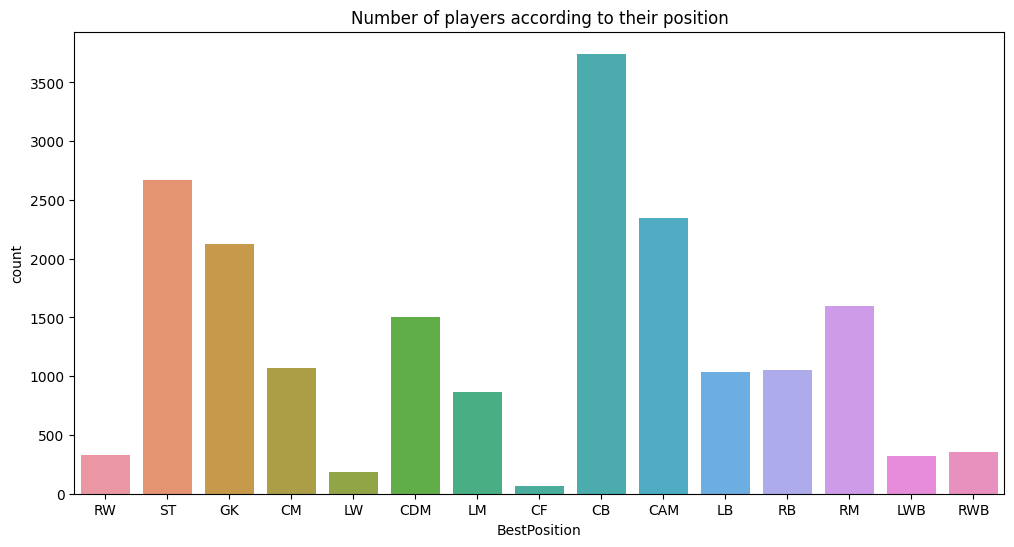

In [126]:
plt.figure(figsize=(12,6))
sns.countplot(x='BestPosition', data=df)
plt.title("Number of players according to their position")

Most of them are CB(Corner back), ST (Striker) and CAM (Central Attacking Midfielder).

### Visualization between Overall based on average age of a player

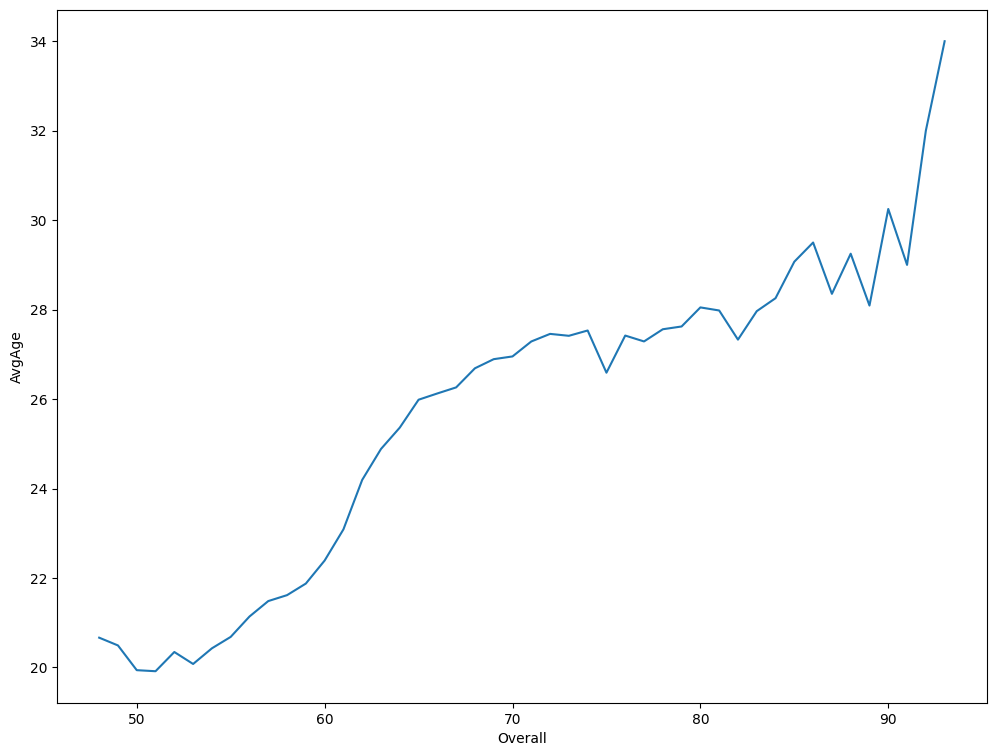

In [127]:
df_avg_age_per_overall = df.groupby('Overall').Age.mean().reset_index(name='AvgAge')
plt.figure(figsize=(12,9))
sns.lineplot(data=df_avg_age_per_overall, x='Overall', y='AvgAge')
plt.show()

We can see that if player is older, there is higher chance of having more Overall stat.

### Preffered Foot

Text(0.5, 1.0, "Player's stronger foot")

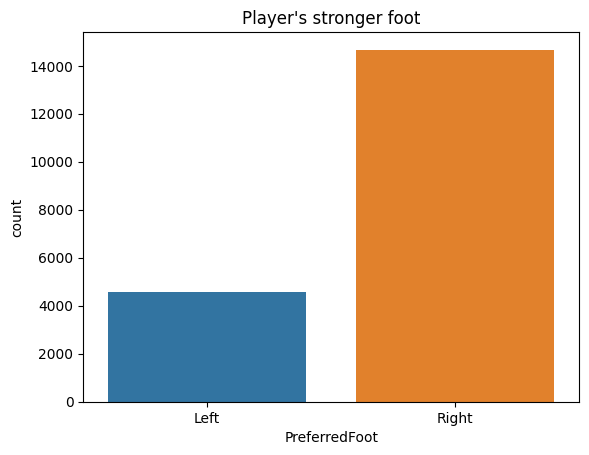

In [128]:
sns.countplot(x='PreferredFoot', data=df)
plt.title("Player's stronger foot")

The most common players are with the preffered right foot.

### Top 5 countries with the most players

In [129]:
df_topNationality = df.groupby("Nationality").Nationality.count()
df_topNationality = df_topNationality.sort_values(ascending=False).head(5)
df_topNationality.head()

Nationality
England      1718
Germany      1214
Spain        1091
France        987
Argentina     955
Name: Nationality, dtype: int64

### Top 5 best players (Overall attribute)

In [130]:
df_topOverall = df.sort_values(by="Overall", ascending=False).head(5)
df_topOverall.head()

FullName  Age  Height Nationality  Overall  Potential  \
0                  Lionel Messi   34     170   Argentina       93         93   
1            Robert Lewandowski   32     185      Poland       92         92   
2  C. Ronaldo dos Santos Aveiro   36     187    Portugal       91         91   
3                 Kylian Mbappé   22     182      France       91         95   
4                     Jan Oblak   28     188    Slovenia       91         93   

   Growth BestPosition                 Club   ValueEUR  WageEUR PreferredFoot  \
0       0           RW  Paris Saint-Germain   78000000   320000          Left   
1       0           ST    FC Bayern München  119500000   270000         Right   
2       0           ST    Manchester United   45000000   270000         Right   
3       4           ST  Paris Saint-Germain  194000000   230000         Right   
4       2           GK   Atlético de Madrid  112000000   130000         Right   

  AttackingWorkRate DefensiveWorkRate  PaceTotal  ShootingTotal  PassingTotal  \
0            Medium               Low         85             92            91   
1              High            Medium         78             92            79   
2              High               Low         87             94            80   
3              High               Low         97             88            80   
4            Medium            Medium         87             92            78   

   DribblingTotal  DefendingTotal  PhysicalityTotal  
0              95              34                65  
1              85              44                82  
2              87              34                75  
3              92              36                77  
4              90              52                90

### Top 5 tallented players (under 23 years old)

In [246]:
promising_players = df[(df.Growth > 4) & (df.Potential > 85) & (df.Age <= 23)].sort_values(by='Potential', ascending=False)
promising_players.head()

FullName  Age  Height Nationality  Overall  Potential  \
26           Erling Haaland   20     194      Norway       88         93   
42   Trent Alexander-Arnold   22     180     England       87         92   
102              Phil Foden   21     171     England       84         92   
117             Kai Havertz   22     188     Germany       84         92   
173     João Félix Sequeira   21     181    Portugal       83         91   

     Growth BestPosition                Club   ValueEUR  WageEUR  \
26        5           ST   Borussia Dortmund  137500000   110000   
42        5           RB           Liverpool  114000000   150000   
102       8          CAM     Manchester City   94500000   125000   
117       8          CAM             Chelsea   94500000   130000   
173       8          CAM  Atlético de Madrid   82000000    61000   

    PreferredFoot AttackingWorkRate DefensiveWorkRate  PaceTotal  \
26           Left              High              High         89   
42          Right              High            Medium         79   
102          Left              High            Medium         84   
117          Left            Medium            Medium         82   
173         Right            Medium            Medium         82   

     ShootingTotal  PassingTotal  DribblingTotal  DefendingTotal  \
26              91            65              80              45   
42              68            88              80              80   
102             78            80              87              56   
117             78            79              84              45   
173             79            76              86              40   

     PhysicalityTotal  
26                 88  
42                 72  
102                57  
117                66  
173                68

### Correlation

C:\Users\asus\AppData\Local\Temp\ipykernel_13412\402430162.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlated_data = df.corr()


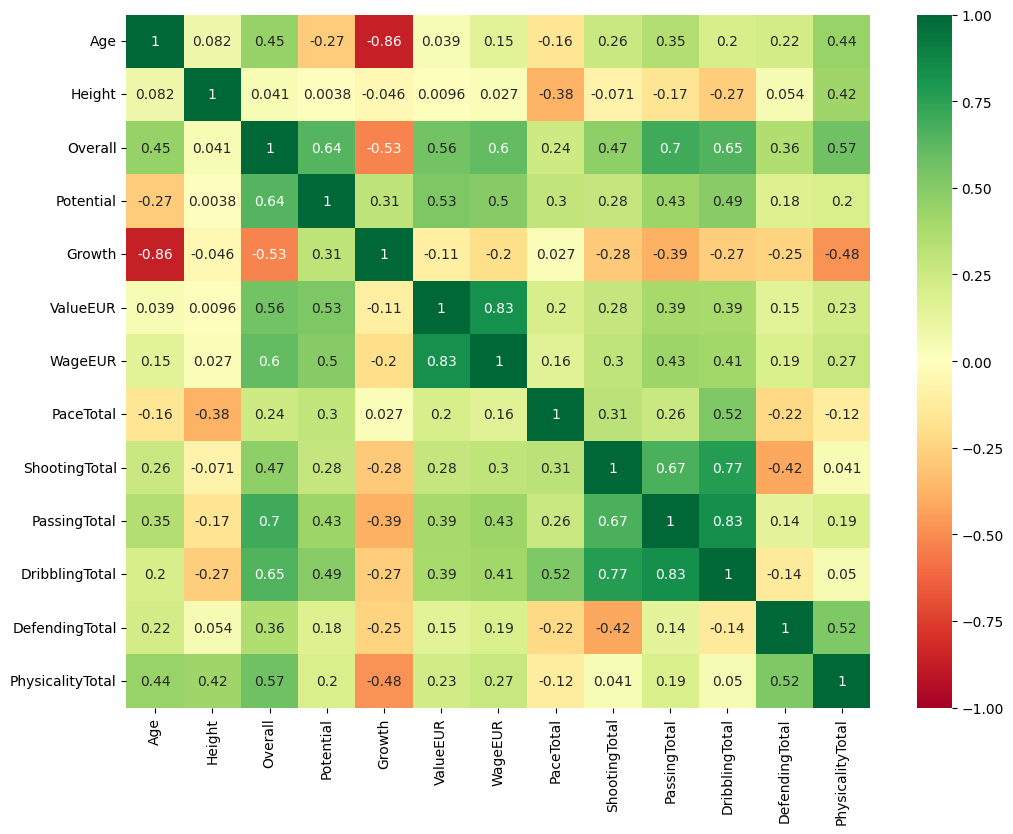

In [134]:
correlated_data = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlated_data, cmap="RdYlGn", annot=True, vmin=-1,vmax=1)
plt.show()

Positive between:
- Overall and ValueEUR.
- WageEUR and ValueEUR. 

Negative between:
- Age and Growth.
- Age and Potential.

# Clustering

### Hypothesis
- I think there will be some cluster that have something with age and potential (Maybe some high potential players under 23 years old)
- Next clusters could be best most skilled and most experience players

### We need to some pre-processing first

### Removal of duplicity (if there is)

In [133]:
duplicity_count = df.duplicated().sum()
if duplicity_count != 0:
    df = df.drop_duplicates()


In [198]:
df_clustering = df[['Age','Height','Overall','Potential','Growth','BestPosition','ValueEUR','WageEUR','PreferredFoot','PaceTotal','ShootingTotal','PassingTotal','DribblingTotal','DefendingTotal','PhysicalityTotal']].copy()
#df_clustering.Nationality = df_clustering.Nationality.astype(str)
df_clustering.BestPosition = df_clustering.BestPosition.astype(str)
df_clustering.PreferredFoot = df_clustering.PreferredFoot.astype(str)
df_clustering.head()

Age  Height  Overall  Potential  Growth BestPosition   ValueEUR  WageEUR  \
0   34     170       93         93       0           RW   78000000   320000   
1   32     185       92         92       0           ST  119500000   270000   
2   36     187       91         91       0           ST   45000000   270000   
3   22     182       91         95       4           ST  194000000   230000   
4   28     188       91         93       2           GK  112000000   130000   

  PreferredFoot  PaceTotal  ShootingTotal  PassingTotal  DribblingTotal  \
0          Left         85             92            91              95   
1         Right         78             92            79              85   
2         Right         87             94            80              87   
3         Right         97             88            80              92   
4         Right         87             92            78              90   

   DefendingTotal  PhysicalityTotal  
0              34                65  
1              44                82  
2              34                75  
3              36                77  
4              52                90

In [199]:
df_clustering.shape

(19156, 15)

### Lets encode categorical features

In [200]:
df_encoded = pd.DataFrame(index = df_clustering.index)
#df_encoded['Nationality'] = sklearn.preprocessing.OrdinalEncoder().fit_transform(df_clustering[['Nationality']])
df_encoded = df_encoded.join(pd.get_dummies(df_clustering[['BestPosition','PreferredFoot']]))
df_encoded.head()

BestPosition_CAM  BestPosition_CB  BestPosition_CDM  BestPosition_CF  \
0                 0                0                 0                0   
1                 0                0                 0                0   
2                 0                0                 0                0   
3                 0                0                 0                0   
4                 0                0                 0                0   

   BestPosition_CM  BestPosition_GK  BestPosition_LB  BestPosition_LM  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                1                0                0   

   BestPosition_LW  BestPosition_LWB  BestPosition_RB  BestPosition_RM  \
0                0                 0                0                0   
1                0                 0                0                0   
2                0                 0                0                0   
3                0                 0                0                0   
4                0                 0                0                0   

   BestPosition_RW  BestPosition_RWB  BestPosition_ST  PreferredFoot_Left  \
0                1                 0                0                   1   
1                0                 0                1                   0   
2                0                 0                1                   0   
3                0                 0                1                   0   
4                0                 0                0                   0   

   PreferredFoot_Right  
0                    0  
1                    1  
2                    1  
3                    1  
4                    1

### Preprocessing numbers
We use MinMaxScaler (normal attributes) and PowerTransformer (unevenly distributed)

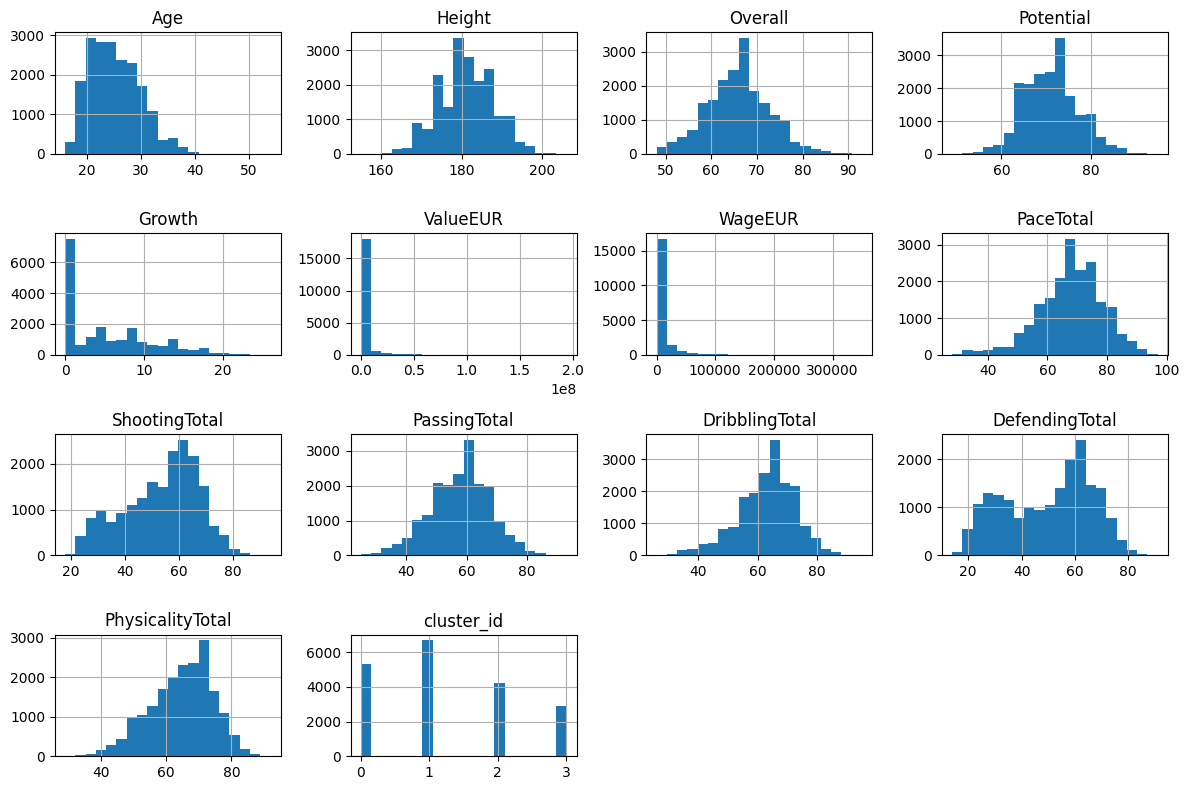

In [176]:
df_clustering.hist(figsize=(12,8),bins=20)
plt.tight_layout()

In [201]:
df_encoded['Age'] = sklearn.preprocessing.minmax_scale(df_clustering.Age)
df_encoded['Height'] = sklearn.preprocessing.minmax_scale(df_clustering.Height)
df_encoded['Overall'] = sklearn.preprocessing.minmax_scale(df_clustering.Overall)
df_encoded['Potential'] = sklearn.preprocessing.minmax_scale(df_clustering.Potential)
df_encoded['Growth'] = sklearn.preprocessing.PowerTransformer().fit_transform(df_clustering[['Growth']])
df_encoded['ValueEUR'] = sklearn.preprocessing.PowerTransformer().fit_transform(df_clustering[['ValueEUR']])
df_encoded['WageEUR'] = sklearn.preprocessing.PowerTransformer().fit_transform(df_clustering[['WageEUR']])
df_encoded['PaceTotal'] = sklearn.preprocessing.minmax_scale(df_clustering.PaceTotal)
df_encoded['ShootingTotal'] = sklearn.preprocessing.minmax_scale(df_clustering.ShootingTotal)
df_encoded['PassingTotal'] = sklearn.preprocessing.minmax_scale(df_clustering.PassingTotal)
df_encoded['DribblingTotal'] = sklearn.preprocessing.minmax_scale(df_clustering.DribblingTotal)
df_encoded['DefendingTotal'] = sklearn.preprocessing.minmax_scale(df_clustering.DefendingTotal)
df_encoded['PhysicalityTotal'] = sklearn.preprocessing.minmax_scale(df_clustering.PhysicalityTotal)

In [202]:
X = df_encoded.values
X

array([[0.        , 0.        , 0.        , ..., 1.        , 0.25974026,
        0.57142857],
       [0.        , 0.        , 0.        , ..., 0.85507246, 0.38961039,
        0.84126984],
       [0.        , 0.        , 0.        , ..., 0.88405797, 0.25974026,
        0.73015873],
       ...,
       [0.        , 1.        , 0.        , ..., 0.02898551, 0.48051948,
        0.42857143],
       [0.        , 1.        , 0.        , ..., 0.08695652, 0.45454545,
        0.34920635],
       [0.        , 1.        , 0.        , ..., 0.05797101, 0.46753247,
        0.3968254 ]])

<AxesSubplot: xlabel='k'>

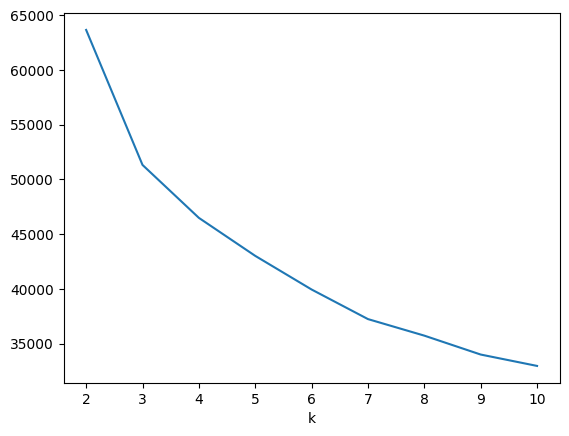

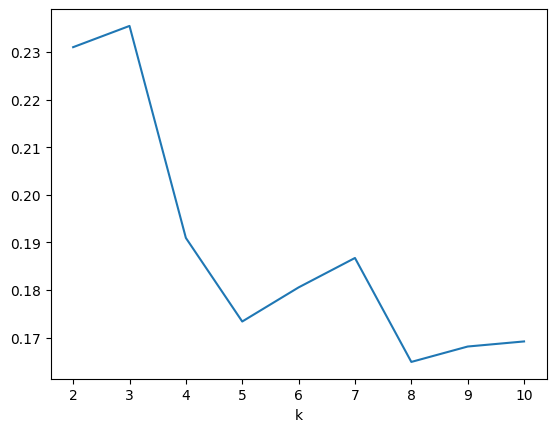

In [203]:
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')
df_clustering_scores.sse.plot()
plt.figure()
df_clustering_scores.silhouette.plot()

### Lets try some clusters and see numbers.

3 Clusters

In [190]:
clustering = sklearn.cluster.KMeans(n_clusters=3)
clustering.fit(X)

pd.Series(clustering.labels_).value_counts()

1    8616
2    6107
0    4433
dtype: int64

4 Clusters

In [208]:
clustering = sklearn.cluster.KMeans(n_clusters=4)
clustering.fit(X)

pd.Series(clustering.labels_).value_counts()

3    6052
2    5543
0    4660
1    2901
dtype: int64

5 Clusters

In [204]:
clustering = sklearn.cluster.KMeans(n_clusters=5)
clustering.fit(X)

pd.Series(clustering.labels_).value_counts()

4    5602
2    4480
1    3905
0    3451
3    1718
dtype: int64

Based on the results I would choose 4 clusters

## Explore clusters

In [209]:
df_clustering['cluster_id'] = clustering.labels_
df_clustering.head()

Age  Height  Overall  Potential  Growth BestPosition   ValueEUR  WageEUR  \
0   34     170       93         93       0           RW   78000000   320000   
1   32     185       92         92       0           ST  119500000   270000   
2   36     187       91         91       0           ST   45000000   270000   
3   22     182       91         95       4           ST  194000000   230000   
4   28     188       91         93       2           GK  112000000   130000   

  PreferredFoot  PaceTotal  ShootingTotal  PassingTotal  DribblingTotal  \
0          Left         85             92            91              95   
1         Right         78             92            79              85   
2         Right         87             94            80              87   
3         Right         97             88            80              92   
4         Right         87             92            78              90   

   DefendingTotal  PhysicalityTotal  cluster_id  
0              34                65           1  
1              44                82           1  
2              34                75           1  
3              36                77           1  
4              52                90           1

### Describe clusters

In [211]:
pd.set_option('display.max_columns', None)
df_clustering.groupby('cluster_id').describe()

Age                                                     Height  \
             count       mean       std   min   25%   50%   75%   max   count   
cluster_id                                                                      
0           4660.0  22.665880  2.214160  16.0  21.0  23.0  24.0  29.0  4660.0   
1           2901.0  27.221648  3.615507  18.0  25.0  27.0  30.0  43.0  2901.0   
2           5543.0  21.091286  2.622248  16.0  19.0  21.0  23.0  38.0  5543.0   
3           6052.0  29.916061  3.204003  21.0  28.0  29.0  32.0  54.0  6052.0   

                                                                    Overall  \
                  mean       std    min    25%    50%    75%    max   count   
cluster_id                                                                    
0           181.287124  6.868492  156.0  176.0  181.0  186.0  203.0  4660.0   
1           181.570838  6.817288  158.0  177.0  182.0  187.0  201.0  2901.0   
2           181.044561  7.032122  155.0  176.0  181.0  186.0  204.0  5543.0   
3           181.429445  6.722353  156.0  177.0  182.0  186.0  206.0  6052.0   

                                                              Potential  \
                 mean       std   min   25%   50%   75%   max     count   
cluster_id                                                                
0           66.783047  3.343780  55.0  64.0  67.0  69.0  80.0    4660.0   
1           76.131679  3.760214  69.0  73.0  75.0  78.0  93.0    2901.0   
2           58.788021  4.408661  48.0  56.0  59.0  62.0  83.0    5543.0   
3           66.404494  3.994456  49.0  64.0  67.0  69.0  78.0    6052.0   

                                                               Growth  \
                 mean       std   min   25%   50%   75%   max   count   
cluster_id                                                              
0           74.501288  4.052219  63.0  72.0  74.0  77.0  88.0  4660.0   
1           78.137194  4.607542  69.0  74.0  78.0  81.0  95.0  2901.0   
2           69.227133  4.978826  51.0  66.0  69.0  72.0  85.0  5543.0   
3           66.667383  3.932908  49.0  64.0  67.0  69.0  78.0  6052.0   

                                                            ValueEUR  \
                 mean       std  min  25%   50%   75%   max    count   
cluster_id                                                             
0            7.718240  3.845175  1.0  5.0   7.0  10.0  23.0   4660.0   
1            2.005515  2.767790  0.0  0.0   0.0   3.0  14.0   2901.0   
2           10.439112  4.721076  0.0  7.0  10.0  14.0  26.0   5543.0   
3            0.262888  0.600328  0.0  0.0   0.0   0.0   3.0   6052.0   

                                                                        \
                    mean           std       min        25%        50%   
cluster_id                                                               
0           2.004265e+06  1.492562e+06  250000.0  1100000.0  1600000.0   
1           1.257589e+07  1.623376e+07  725000.0  3500000.0  6500000.0   
2           5.498557e+05  4.063182e+05       0.0   275000.0   475000.0   
3           8.691662e+05  6.969685e+05       0.0   400000.0   725000.0   

                                    WageEUR                              \
                   75%          max   count          mean           std   
cluster_id                                                                
0            2400000.0   33500000.0  4660.0   5926.523605   4730.649669   
1           15000000.0  194000000.0  2901.0  38487.073423  36927.686862   
2             700000.0    3300000.0  5543.0   1049.756450    724.353041   
3            1200000.0   11000000.0  6052.0   4179.238268   3985.372233   

                                                        PaceTotal             \
               min      25%      50%      75%       max     count       mean   
cluster_id                                                                     
0            500.0   3000.0   4000.0   8000.0   35000.0    4660.0

In [212]:
df_clustering.groupby('cluster_id').describe(include='O')

BestPosition                  PreferredFoot                    
                  count unique top  freq         count unique    top  freq
cluster_id                                                                
0                  4660     15  CB   912          4660      2  Right  3457
1                  2901     15  CB   499          2901      2  Right  2104
2                  5543     15  CB  1084          5543      2  Right  4376
3                  6052     15  CB  1230          6052      2  Right  4654

### Visualization

#### Age

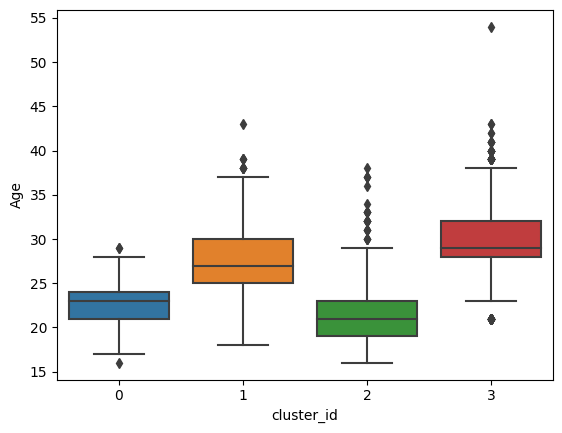

In [218]:
sns.boxplot(data=df_clustering, x="cluster_id", y="Age")
plt.show()

- We can see that the cluster_id 3 has the most old players. Also contains the oldest player.

#### Height


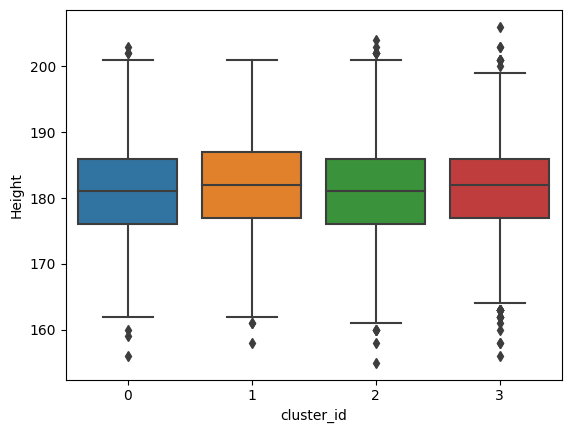

In [217]:
sns.boxplot(data=df_clustering, x="cluster_id", y="Height")
plt.show()

- There is not difference in height which make sense in football.

#### Overall

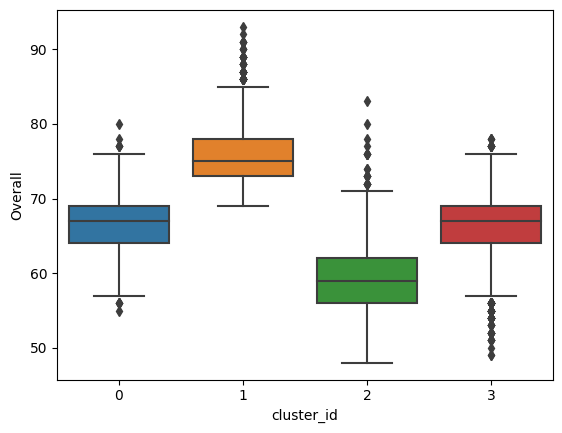

In [216]:
sns.boxplot(data=df_clustering, x="cluster_id", y="Overall",)
plt.show()

- Overall (best players) are in cluster_id 2. Overall, cluster_id 2 has a big edge over the others.

#### Potential

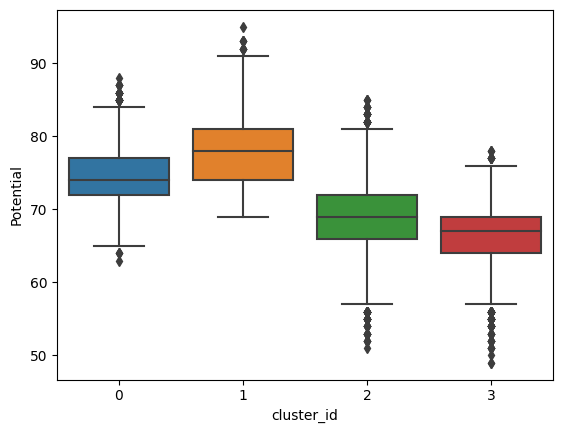

In [219]:
sns.boxplot(data=df_clustering, x="cluster_id", y="Potential")
plt.show()

- We can see that, players with the most potential are in cluster_id 2. Players with little potential are in cluster_id 3, which make sense, because they are oldest.

#### Growth

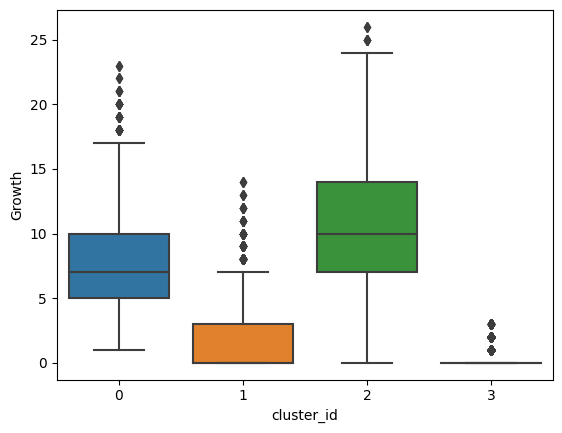

In [231]:
sns.boxplot(data=df_clustering, x="cluster_id", y="Growth")
plt.show()

- Cluster_id2 contains players with the greatest growth. After him there is cluster_id 0 with many outliers.

#### ValueEUR

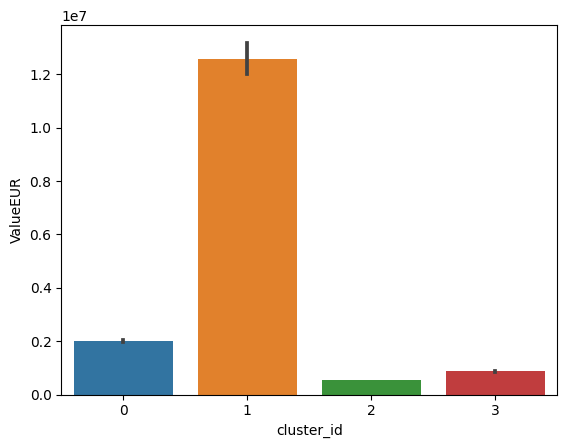

In [221]:
sns.barplot(data=df_clustering, x="cluster_id", y="ValueEUR")
plt.show()

- The cluster_id 2 contains the most expensive players. Data is accurate (does not contain outliers)

#### Preferred Foot

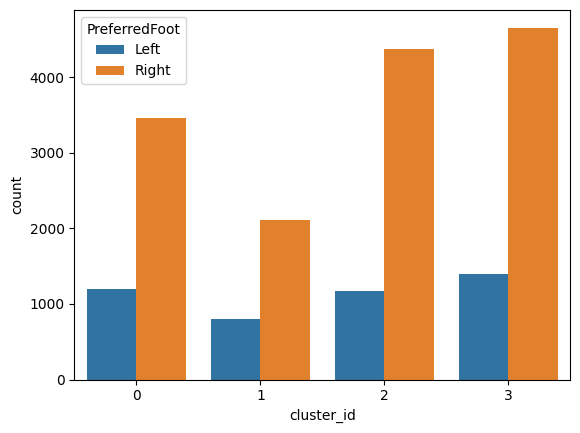

In [229]:
sns.countplot(data=df_clustering, x="cluster_id", hue="PreferredFoot")
plt.show()

- There is no difference in any cluster

#### BestPosition

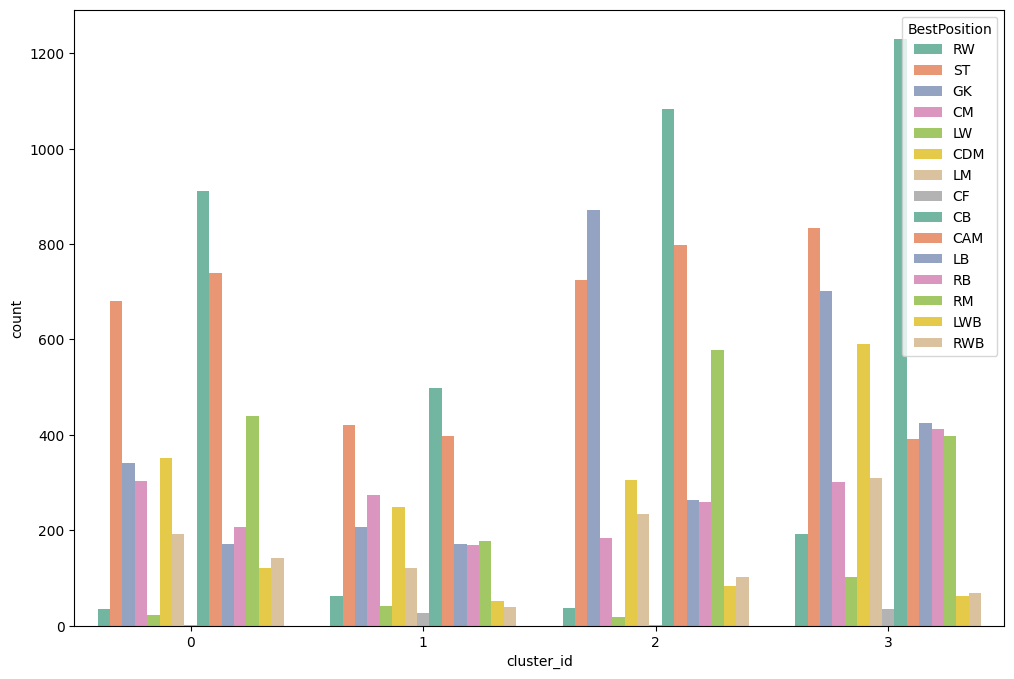

In [245]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_clustering,x="cluster_id", hue="BestPosition",palette="Set2")
plt.show()

- We can see that in cluster_id 0 there is many CAM ( Central Attacking Midfielder) and RM (Right Midfielder).

#### PassingTotal

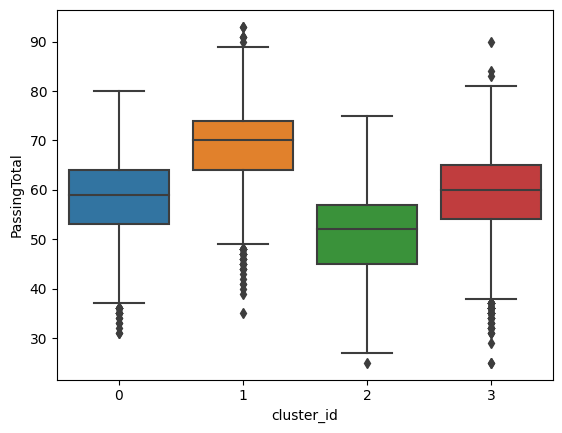

In [241]:
sns.boxplot(data=df_clustering, x="cluster_id", y="PassingTotal")
plt.show()

#### DribblingTotal

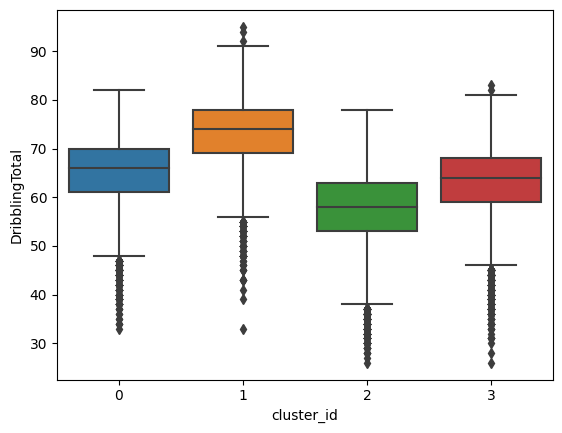

In [238]:
sns.boxplot(data=df_clustering, x="cluster_id", y="DribblingTotal")
plt.show()

#### PhysicalityTotal

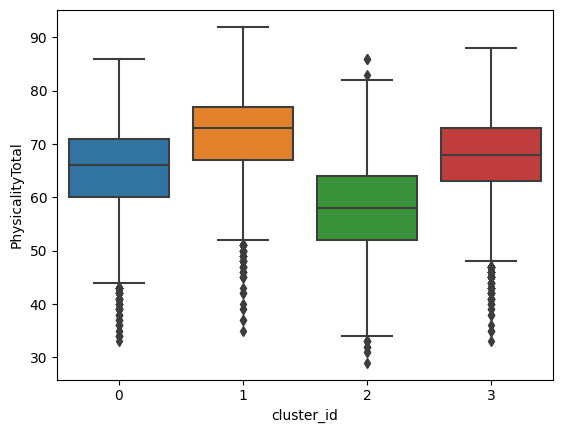

In [240]:
sns.boxplot(data=df_clustering, x="cluster_id", y="PhysicalityTotal")
plt.show()

- We can see that PassingTotal, DribblingTotal, PhysicalityTotal stats correlate with Overall

# Summary

We can see that many attributes correlate with each other. Also we can see that if player is older, there is higher chance of having more Overall stat. 

Most players are CBs(Corner backs) and STs (Strikers).

Only some fraction of players have high value in FIFA. It mostly depends on Overall stat and Age.

I think the top 5 rankings make sense based on my personal opinion.


#### KMeans
For the columns selected by me, I decided to split the data into 4 clusters using KMeans:

- Cluster_id 0 are young, medium Overall, and most players with high potential. They have the second biggest Growth. Probably talented players.
- Cluster_id 1 contains the best players. They are middle aged and have the most potential, but with zero Growth. Probably elite and best players. They are also the most expensive by a wide margin.
- Cluster_id 2 contains the youngest players with the greatest growth. They're just at the beginning of their careers, so they're not that good of Overall.
- Cluster_id 3 contains oldest and most experienced players. They have almost zero growth and the smallest potential. Probably due to age, which makes sense.
